In [50]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder  

import scipy.stats as stats  
import statsmodels.api as sm  

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 50)  

sns.set(style="whitegrid")  

%matplotlib inline

In [51]:
df_2025 = pd.read_excel('EPL2025.xlsx')
print(df_2025)

              Squad  # Pl   Age  Poss  MP  Starts   Min  90s  Gls  Ast  G+A   
0           Arsenal    25  25.8  56.9  38     418  3420   38   67   55  122  \
1       Aston Villa    28  27.0  50.5  38     418  3420   38   56   45  101   
2       Bournemouth    29  25.1  48.5  38     418  3420   38   57   41   98   
3         Brentford    28  25.8  47.9  38     418  3420   38   65   44  109   
4          Brighton    32  24.8  52.3  38     418  3420   38   64   41  105   
5           Chelsea    29  23.7  57.1  38     418  3420   38   61   47  108   
6    Crystal Palace    29  26.2  42.8  38     418  3420   38   49   38   87   
7           Everton    26  28.0  40.9  38     418  3420   38   39   27   66   
8            Fulham    26  28.0  52.3  38     418  3420   38   53   44   97   
9      Ipswich Town    32  25.8  40.6  38     418  3420   38   35   26   61   
10   Leicester City    32  26.6  45.4  38     418  3420   38   33   25   58   
11        Liverpool    24  27.2  57.7  38     418  3

In [52]:
df_2024 = pd.read_excel('EPL2024.xlsx')
print(df_2024)

              Squad  # Pl   Age  Poss  MP  Starts   Min  90s  Gls  Ast  G+A   
0           Arsenal    25  25.0  58.2  38     418  3420   38   86   62  148  \
1       Aston Villa    31  26.9  53.1  38     418  3420   38   72   55  127   
2       Bournemouth    30  25.7  44.4  38     418  3420   38   52   39   91   
3         Brentford    28  26.6  45.2  38     418  3420   38   54   38   92   
4          Brighton    30  25.9  59.8  38     418  3420   38   50   36   86   
5           Burnley    31  24.5  47.4  38     418  3420   38   40   30   70   
6           Chelsea    32  24.2  58.6  38     418  3420   38   76   51  127   
7    Crystal Palace    26  26.7  42.3  38     418  3420   38   56   43   99   
8           Everton    26  27.1  40.8  38     418  3420   38   40   17   57   
9            Fulham    25  28.4  50.6  38     418  3420   38   54   40   94   
10        Liverpool    30  26.3  61.3  38     418  3420   38   80   60  140   
11       Luton Town    28  26.7  42.4  38     418  3

In [72]:
output_path = 'D:/Work/Data Analysis TFA/07 EPL 2025/Main Files/EPL_Merged_2024_2025.xlsx'

with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    df_2024.to_excel(writer, sheet_name='EPL_2024', index=False)
    df_2025.to_excel(writer, sheet_name='EPL_2025', index=False)

print("Merged Excel file saved successfully at:", output_path)

Merged Excel file saved successfully at: D:/Work/Data Analysis TFA/07 EPL 2025/Main Files/EPL_Merged_2024_2025.xlsx


Calculate Differences in Key Stats Between Seasons

In [5]:
for col in ['Pts', 'GF', 'GA', 'xG', 'xGA', 'xGD']:
    merged[f'{col}_Diff'] = merged[f'{col}_2025'] - merged[f'{col}_2024']

merged[['Squad'] + [c for c in merged.columns if 'Diff' in c]].head()

,Squad,Pts_Diff,GF_Diff,GA_Diff,xG_Diff,xGA_Diff,xGD_Diff
0,Manchester City,-20,-24,10,-12.4,12.1,-24.5
1,Arsenal,-15,-22,5,-16.2,6.5,-22.7
2,Liverpool,2,0,0,-5.6,-7.1,1.6
3,Aston Villa,-2,-18,-10,-7.2,-9.8,2.5
4,Tottenham,-28,-10,4,-9.4,-0.1,-9.3


Rank Teams by Most Improved in Points

In [6]:
merged.sort_values(by='Pts_Diff', ascending=False)[['Squad', 'Pts_2024', 'Pts_2025', 'Pts_Diff']]

,Squad,Pts_2024,Pts_2025,Pts_Diff
16,Nott'ham Forest,32,65,33
15,Brentford,39,56,17
10,Brighton,48,61,13
14,Everton,40,48,8
11,Bournemouth,48,56,8
12,Fulham,47,54,7
5,Chelsea,63,69,6
6,Newcastle Utd,60,66,6
9,Crystal Palace,49,53,4
2,Liverpool,82,84,2


Rank Teams by Offensive Improvement (xG Increase)

In [7]:
merged.sort_values(by='xG_Diff', ascending=False)[['Squad', 'xG_2024', 'xG_2025', 'xG_Diff']]

,Squad,xG_2024,xG_2025,xG_Diff
9,Crystal Palace,48.6,60.4,11.8
11,Bournemouth,55.9,64.0,8.1
10,Brighton,56.8,58.7,1.9
15,Brentford,58.2,59.0,0.8
12,Fulham,50.8,49.0,-1.8
13,Wolves,46.7,43.7,-3.0
7,Manchester Utd,56.5,52.6,-3.9
16,Nott'ham Forest,49.9,45.5,-4.4
8,West Ham,52.3,47.0,-5.3
2,Liverpool,87.8,82.2,-5.6


Rank Teams by Defensive Improvement (xGA Decrease)

In [8]:
merged['xGA_Improvement'] = merged['xGA_2024'] - merged['xGA_2025']
merged.sort_values(by='xGA_Improvement', ascending=False)[['Squad', 'xGA_2024', 'xGA_2025', 'xGA_Improvement']]

,Squad,xGA_2024,xGA_2025,xGA_Improvement
6,Newcastle Utd,61.4,45.5,15.9
12,Fulham,62.9,47.2,15.7
7,Manchester Utd,68.9,53.8,15.1
8,West Ham,71.1,59.7,11.4
5,Chelsea,58.1,47.3,10.8
3,Aston Villa,59.9,50.1,9.8
11,Bournemouth,58.1,48.5,9.6
13,Wolves,67.7,58.1,9.6
14,Everton,55.2,46.2,9.0
2,Liverpool,45.7,38.6,7.1


Rank Teams by Overall Tactical Growth (xGD Difference)

In [12]:
merged.sort_values(by='xGD_Diff', ascending=False)[['Squad', 'xGD_2024', 'xGD_2025', 'xGD_Diff']]

,Squad,xGD_2024,xGD_2025,xGD_Diff
11,Bournemouth,-2.2,15.5,17.7
9,Crystal Palace,-3.4,11.4,14.8
12,Fulham,-12.1,1.8,13.9
7,Manchester Utd,-12.5,-1.3,11.2
13,Wolves,-21.0,-14.5,6.5
8,West Ham,-18.8,-12.7,6.1
5,Chelsea,16.4,20.5,4.1
6,Newcastle Utd,14.6,18.3,3.7
10,Brighton,1.4,4.1,2.7
3,Aston Villa,3.4,5.9,2.5


Top 10 Premier League teams by xGD improvement from 2024 to 2025

In [10]:
import pandas as pd

data = {
    "Squad": [
        "Manchester City", "Arsenal", "Liverpool", "Aston Villa", "Tottenham", "Chelsea",
        "Newcastle Utd", "Manchester Utd", "West Ham", "Crystal Palace", "Brighton",
        "Bournemouth", "Fulham", "Wolves", "Everton", "Brentford", "Nott'ham Forest"
    ],
    "xGD_2024": [44.9, 48.2, 42, 3.4, 4.8, 16.4, 14.6, -12.5, -18.8, -3.4, 1.4, -2.2, -12.1, -21, -1.2, 2.2, -3.4],
    "xGD_2025": [20.4, 25.5, 43.6, 5.9, -4.5, 20.5, 18.3, -1.3, -12.7, 11.4, 4.1, 15.5, 1.8, -14.5, -4.5, 3.6, -3.4],
    "xGD_Diff": [-24.5, -22.7, 1.6, 2.5, -9.3, 4.1, 3.7, -15.1, 6.1, 14.8, 2.7, 17.7, 13.9, -6.5, -3.3, 1.4, 0]
}

df = pd.DataFrame(data)
df_sorted = df.sort_values(by="xGD_Diff", ascending=False)
top_10 = df_sorted.head(10)
print("Top 10 Premier League teams by xGD improvement from 2024 to 2025:\n")
print(top_10[["Squad", "xGD_2024", "xGD_2025", "xGD_Diff"]])

Top 10 Premier League teams by xGD improvement from 2024 to 2025:

             Squad  xGD_2024  xGD_2025  xGD_Diff
11     Bournemouth      -2.2      15.5      17.7
9   Crystal Palace      -3.4      11.4      14.8
12          Fulham     -12.1       1.8      13.9
8         West Ham     -18.8     -12.7       6.1
5          Chelsea      16.4      20.5       4.1
6    Newcastle Utd      14.6      18.3       3.7
10        Brighton       1.4       4.1       2.7
3      Aston Villa       3.4       5.9       2.5
2        Liverpool      42.0      43.6       1.6
15       Brentford       2.2       3.6       1.4


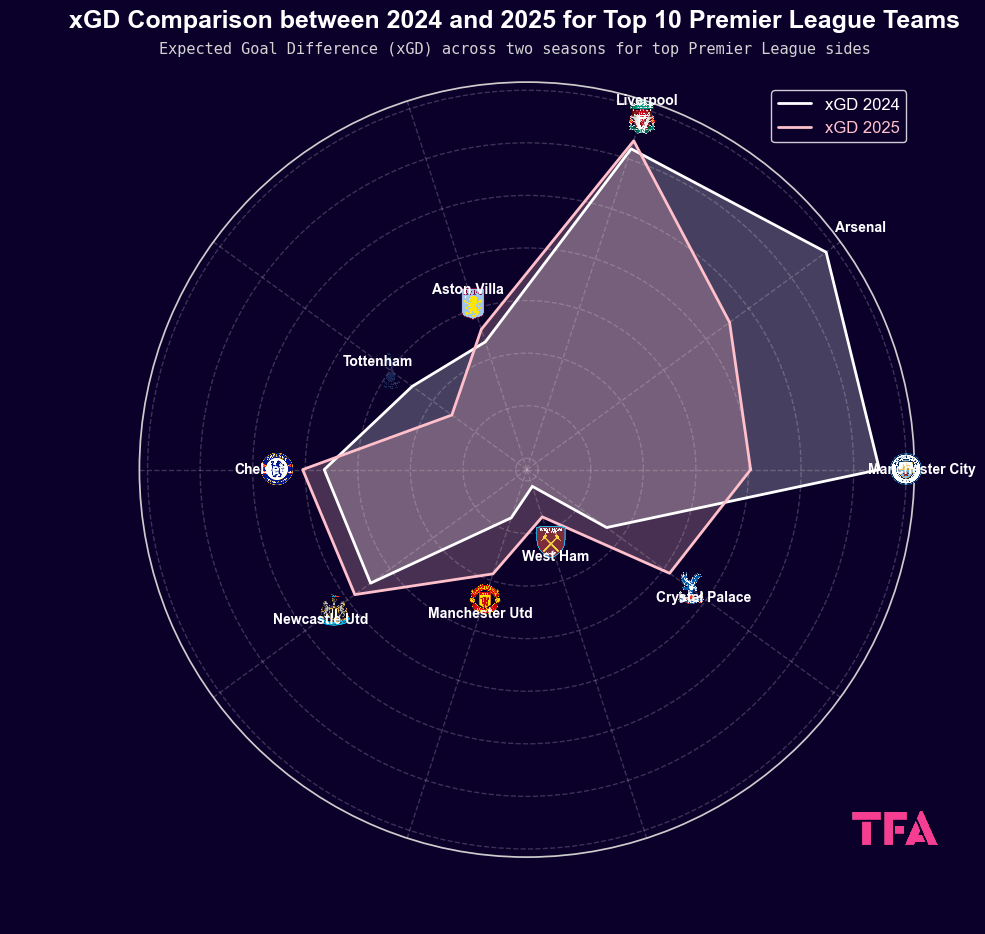

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

data = {
    "Squad": [
        "Manchester City", "Arsenal", "Liverpool", "Aston Villa", "Tottenham",
        "Chelsea", "Newcastle Utd", "Manchester Utd", "West Ham", "Crystal Palace"
    ],
    "xGD_2024": [44.9, 48.2, 42, 3.4, 4.8, 16.4, 14.6, -12.5, -18.8, -3.4],
    "xGD_2025": [20.4, 25.5, 43.6, 5.9, -4.5, 20.5, 18.3, -1.3, -12.7, 11.4]
}

df = pd.DataFrame(data)

teams = df['Squad']
xgd_2024 = df['xGD_2024'].values
xgd_2025 = df['xGD_2025'].values

num_vars = len(teams)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

xgd_2024 = np.append(xgd_2024, xgd_2024[0])
xgd_2025 = np.append(xgd_2025, xgd_2025[0])

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

line1, = ax.plot(angles, xgd_2024, color='white', linewidth=2, label='xGD 2024')
ax.fill(angles, xgd_2024, color='white', alpha=0.25)

line2, = ax.plot(angles, xgd_2025, color='pink', linewidth=2, label='xGD 2025')
ax.fill(angles, xgd_2025, color='pink', alpha=0.25)

logos_path = "D:/Work/Data Analysis TFA/04 Vertical Progressions & Transitional Threat Analysis/logos/"

for i in range(num_vars):
    logo_path = os.path.join(logos_path, f"{teams.iloc[i]}.png")
    if os.path.exists(logo_path):
        logo_img = Image.open(logo_path)
        imagebox = OffsetImage(logo_img, zoom=0.09)
        ab = AnnotationBbox(imagebox, (angles[i], max(xgd_2024[i], xgd_2025[i]) + 5), frameon=False, box_alignment=(0.5, 0.5))
        ax.add_artist(ab)

    ax.text(
        angles[i], max(xgd_2024[i], xgd_2025[i]) + 8,
        teams.iloc[i],
        ha='center', va='center',
        color='white', fontsize=10, weight='bold'
    )

ax.set_xticks(angles[:-1])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(color='white', linestyle='--', alpha=0.2)

legend = ax.legend(loc='upper right', fontsize=12, facecolor='#0A002A', edgecolor='white')
legend.get_texts()[0].set_color('white')
legend.get_texts()[1].set_color('pink')

fig.suptitle(
    'xGD Comparison between 2024 and 2025 for Top 10 Premier League Teams',
    color='white', fontsize=18, weight='bold', y=0.91
)

fig.text(
    0.5, 0.866,
    'Expected Goal Difference (xGD) across two seasons for top Premier League sides',
    ha='center', color='lightgrey', fontsize=11, fontname='DejaVu Sans Mono'
)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    logo_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(logo_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.95, 0.05), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.subplots_adjust(top=0.85, bottom=0.05)
plt.show()

Key Metrics Comparison for Nott'ham Forest 2024 vs 2025

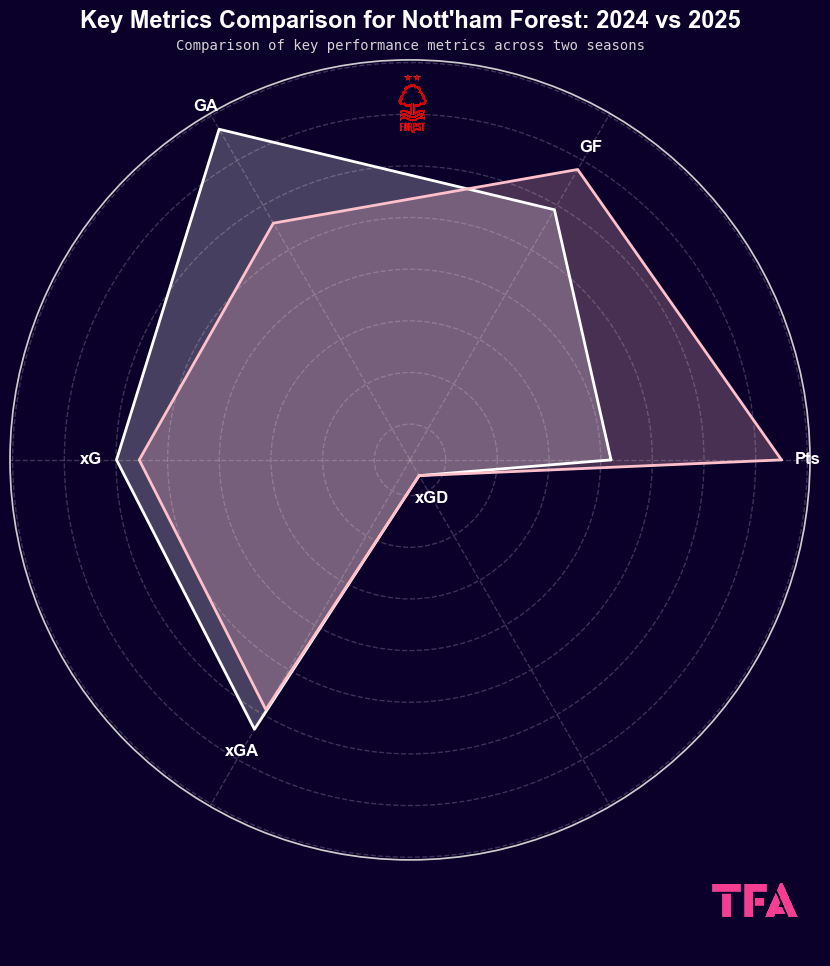

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

data = {
    "Squad": ["Nott'ham Forest"],
    "Pts_2024": [32],
    "GF_2024": [49],
    "GA_2024": [67],
    "xG_2024": [49.9],
    "xGA_2024": [53.3],
    "xGD_2024": [-3.4],
    "Pts_2025": [65],
    "GF_2025": [58],
    "GA_2025": [46],
    "xG_2025": [45.5],
    "xGA_2025": [48.9],
    "xGD_2025": [-3.4],
}

df = pd.DataFrame(data)

metrics = ["Pts", "GF", "GA", "xG", "xGA", "xGD"]
team_name = df['Squad'].iloc[0]

values_2024 = [df[f"{m}_2024"].iloc[0] for m in metrics]
values_2025 = [df[f"{m}_2025"].iloc[0] for m in metrics]

num_vars = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

values_2024 += values_2024[:1]
values_2025 += values_2025[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor('#0A002A')
ax.set_facecolor('#0A002A')

ax.plot(angles, values_2024, color='white', linewidth=2, label='2024')
ax.fill(angles, values_2024, color='white', alpha=0.25)

ax.plot(angles, values_2025, color='pink', linewidth=2, label='2025')
ax.fill(angles, values_2025, color='pink', alpha=0.25)

for i in range(num_vars):
    ax.text(
        angles[i], max(values_2024[i], values_2025[i]) + 5,
        metrics[i],
        ha='center', va='center',
        color='white', fontsize=12, weight='bold'
    )

logos_path = "D:/Work/Data Analysis TFA/04 Vertical Progressions & Transitional Threat Analysis/logos/"
logo_path = os.path.join(logos_path, f"{team_name}.png")
if os.path.exists(logo_path):
    logo_img = Image.open(logo_path)
    imagebox = OffsetImage(logo_img, zoom=0.15)
    ab = AnnotationBbox(imagebox, (0.4435, 0.831), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

ax.set_xticks(angles[:-1])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(color='white', linestyle='--', alpha=0.2)

fig.suptitle(
    f'Key Metrics Comparison for {team_name}: 2024 vs 2025',
    color='white', fontsize=17, weight='bold', y=0.95,
    ha='center'
)

fig.text(
    0.5, 0.91,
    'Comparison of key performance metrics across two seasons',
    ha='center', color='lightgrey', fontsize=10, fontname='DejaVu Sans Mono'
)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    logo_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(logo_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.81, 0.01), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9)

plt.show()


Point Swings Across Two Seasons: Measuring Progress in the Premier League

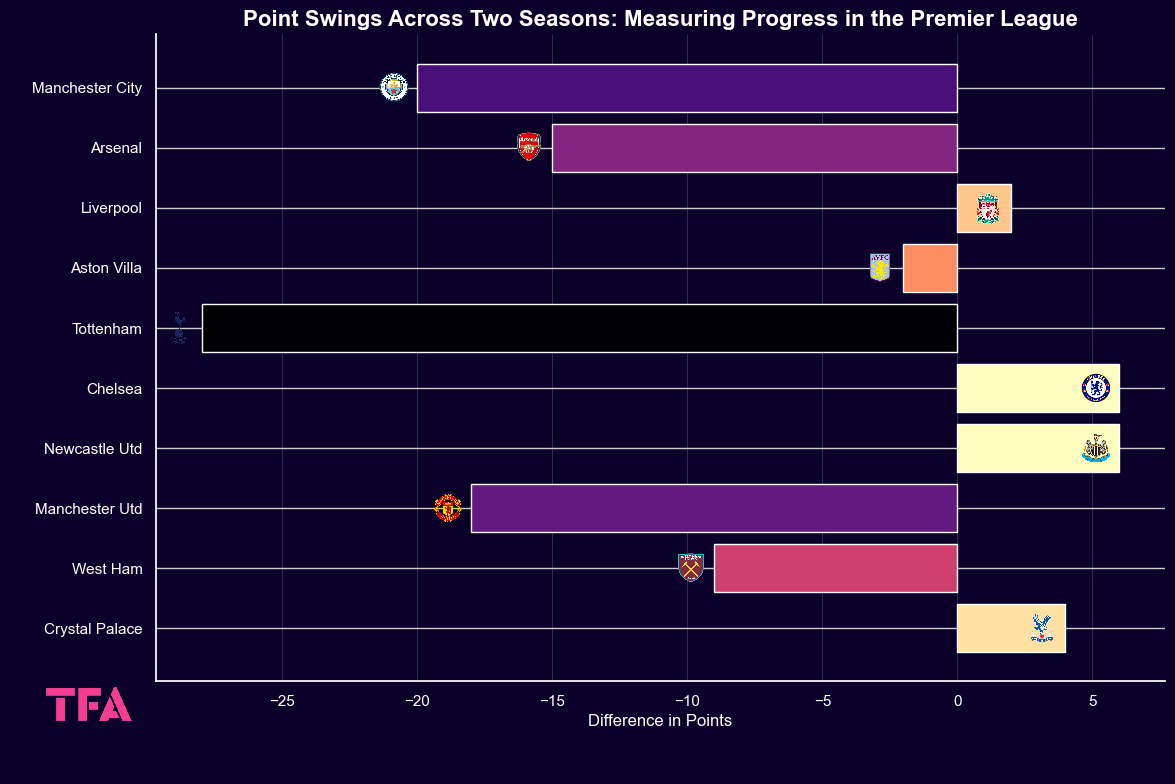

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

data = {
    "Squad": [
        "Manchester City", "Arsenal", "Liverpool", "Aston Villa", "Tottenham",
        "Chelsea", "Newcastle Utd", "Manchester Utd", "West Ham", "Crystal Palace"
    ],
    "Pts_Diff": [-20, -15, 2, -2, -28, 6, 6, -18, -9, 4]
}

merged = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

norm = plt.Normalize(min(merged['Pts_Diff']), max(merged['Pts_Diff']))
colors = plt.cm.magma(norm(merged['Pts_Diff']))

bars = ax.barh(merged['Squad'], merged['Pts_Diff'], color=colors)
ax.set_xlabel('Difference in Points', fontsize=12, color='white')
ax.set_title('Point Swings Across Two Seasons: Measuring Progress in the Premier League', fontsize=16, color='white', weight='bold')
ax.invert_yaxis()

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

ax.grid(True, axis='x', color='white', linestyle='-', linewidth=0.4, alpha=0.3)

logos_path = "D:/Work/Data Analysis TFA/04 Vertical Progressions & Transitional Threat Analysis/logos/"

for i, squad in enumerate(merged['Squad']):
    logo_path = os.path.join(logos_path, f"{squad}.png")
    if os.path.exists(logo_path):
        logo_img = Image.open(logo_path)
        imagebox = OffsetImage(logo_img, zoom=0.08)
        ab = AnnotationBbox(imagebox, (merged['Pts_Diff'][i], i), frameon=False, box_alignment=(1.2, 0.5), xycoords='data')
        ax.add_artist(ab)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.12, 0.03), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.tight_layout()
plt.show()

Top 10 EPL Teams: Assists vs Expected Assists (2024 & 2025)

C:\Users\muspo\AppData\Local\Temp\ipykernel_10900\3233090343.py:71: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
C:\Users\muspo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


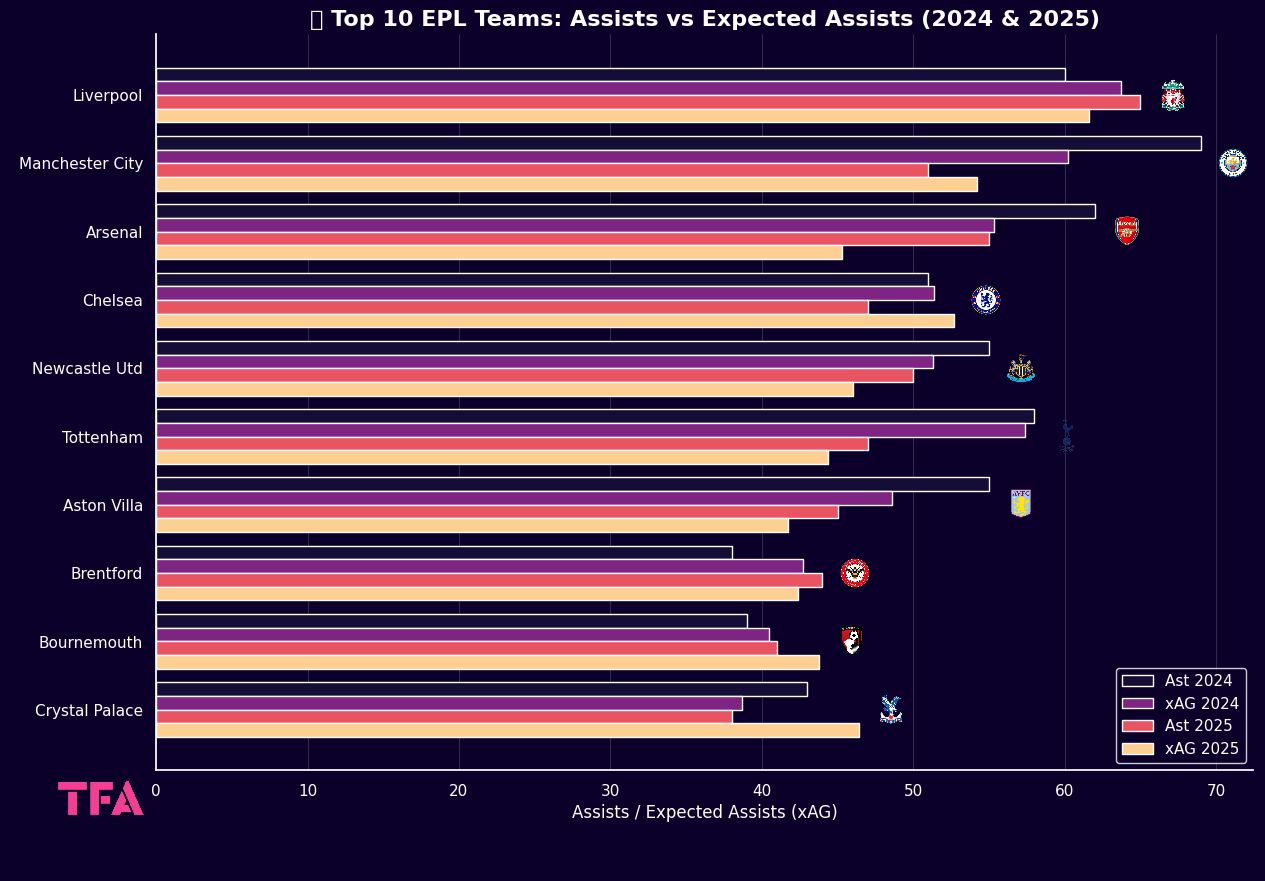

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

df_2024_filtered = df_2024[['Squad', 'Ast', 'xAG']].set_index('Squad')
df_2025_filtered = df_2025[['Squad', 'Ast', 'xAG']].set_index('Squad')

common_teams = df_2024_filtered.index.intersection(df_2025_filtered.index)

df_2024_filtered = df_2024_filtered.loc[common_teams]
df_2025_filtered = df_2025_filtered.loc[common_teams]

combined_df = pd.DataFrame({
    'Ast_2024': df_2024_filtered['Ast'],
    'xAG_2024': df_2024_filtered['xAG'],
    'Ast_2025': df_2025_filtered['Ast'],
    'xAG_2025': df_2025_filtered['xAG']
})

combined_df['Total'] = combined_df['Ast_2025'] + combined_df['xAG_2025']
combined_df = combined_df.sort_values(by='Total', ascending=False).drop(columns='Total').head(10)

fig, ax = plt.subplots(figsize=(13, 9))
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

bar_width = 0.2
indices = np.arange(len(combined_df))

colors = plt.cm.magma(np.linspace(0.1, 0.9, 4))

ax.barh(indices - 1.5*bar_width, combined_df['Ast_2024'], height=bar_width, color=colors[0], label='Ast 2024')
ax.barh(indices - 0.5*bar_width, combined_df['xAG_2024'], height=bar_width, color=colors[1], label='xAG 2024')
ax.barh(indices + 0.5*bar_width, combined_df['Ast_2025'], height=bar_width, color=colors[2], label='Ast 2025')
ax.barh(indices + 1.5*bar_width, combined_df['xAG_2025'], height=bar_width, color=colors[3], label='xAG 2025')

ax.set_yticks(indices)
ax.set_yticklabels(combined_df.index, color='white')
ax.set_xlabel('Assists / Expected Assists (xAG)', fontsize=12, color='white')
ax.set_title('Top 10 EPL Teams: Assists vs Expected Assists (2024 & 2025)', fontsize=16, color='white', weight='bold')
ax.invert_yaxis()
ax.tick_params(axis='x', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.grid(True, axis='x', color='white', linestyle='-', linewidth=0.4, alpha=0.3)
ax.legend(facecolor='#0A002A', edgecolor='white', labelcolor='white')

logos_path = "D:/Work/Data Analysis TFA/04 Vertical Progressions & Transitional Threat Analysis/logos/"

for i, squad in enumerate(combined_df.index):
    logo_filename = squad.replace("United", "Utd") if "United" in squad and squad not in os.listdir(logos_path) else squad
    logo_path = os.path.join(logos_path, f"{logo_filename}.png")
    if os.path.exists(logo_path):
        logo_img = Image.open(logo_path)
        imagebox = OffsetImage(logo_img, zoom=0.08)
        ab = AnnotationBbox(imagebox, (max(combined_df.iloc[i]) + 1, i), frameon=False, box_alignment=(0, 0.5), xycoords='data')
        ax.add_artist(ab)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.12, 0.03), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.tight_layout()
plt.show()

Defensive Work Rate Shift: Tkl+Int Comparison Between EPL Seasons

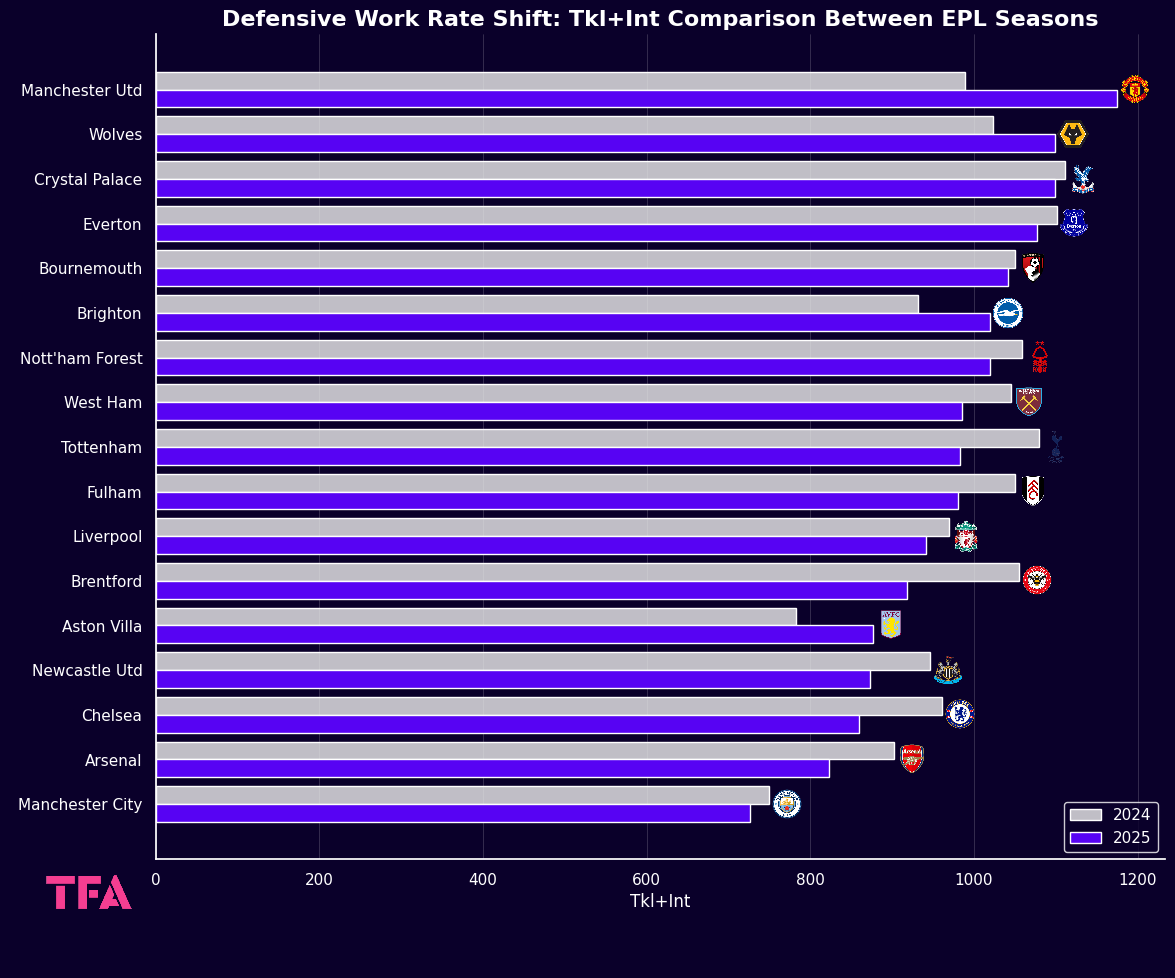

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

df_2024_filtered = df_2024[['Squad', 'Tkl+Int']].set_index('Squad')
df_2025_filtered = df_2025[['Squad', 'Tkl+Int']].set_index('Squad')

common_teams = df_2024_filtered.index.intersection(df_2025_filtered.index)
common_teams = common_teams[:17]

df_2024_filtered = df_2024_filtered.loc[common_teams]
df_2025_filtered = df_2025_filtered.loc[common_teams]

combined_df = pd.DataFrame({
    '2024': df_2024_filtered['Tkl+Int'],
    '2025': df_2025_filtered['Tkl+Int']
})
combined_df = combined_df.sort_values(by='2025', ascending=False)

fig, ax = plt.subplots(figsize=(12, 10))
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

bar_width = 0.4
indices = np.arange(len(combined_df))

ax.barh(indices - bar_width/2, combined_df['2024'], height=bar_width, color="#EBEBEBCF", label='2024')
ax.barh(indices + bar_width/2, combined_df['2025'], height=bar_width, color="#5703F3", label='2025')

ax.set_yticks(indices)
ax.set_yticklabels(combined_df.index, color='white')
ax.set_xlabel('Tkl+Int', fontsize=12, color='white')
ax.set_title('Defensive Work Rate Shift: Tkl+Int Comparison Between EPL Seasons', fontsize=16, color='white', weight='bold')
ax.invert_yaxis()
ax.tick_params(axis='x', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.grid(True, axis='x', color='white', linestyle='-', linewidth=0.4, alpha=0.3)
ax.legend(facecolor='#0A002A', edgecolor='white', labelcolor='white')

logos_path = "D:/Work/Data Analysis TFA/04 Vertical Progressions & Transitional Threat Analysis/logos/"

for i, squad in enumerate(combined_df.index):
    logo_filename = squad.replace("United", "Utd") if "United" in squad and squad not in os.listdir(logos_path) else squad
    logo_path = os.path.join(logos_path, f"{logo_filename}.png")
    if os.path.exists(logo_path):
        logo_img = Image.open(logo_path)
        imagebox = OffsetImage(logo_img, zoom=0.08)
        ab = AnnotationBbox(imagebox, (max(combined_df.iloc[i]) + 1, i), frameon=False, box_alignment=(0, 0.5), xycoords='data')
        ax.add_artist(ab)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.12, 0.03), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.tight_layout()
plt.show()
